In [1]:
import requests
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
url = """https://idena.navarra.es/ogc/wfs"""
parameters = {
    'service': 'WFS',
    'version': '2.0.0',
    'srsname': 'EPSG:4326',
    'request': 'getFeature',
    'outputFormat': 'json'
}

parameters['typename']= 'IDENA:PATRIM_Pol_Merindades'
response = requests.post(url, data=parameters)
json = response.json()
merindadesGDF = gpd.GeoDataFrame.from_features(json["features"])

parameters['typename']= 'IDENA:CATAST_Pol_Municipio'
response = requests.post(url, data=parameters)
json = response.json()
municipiosGDF = gpd.GeoDataFrame.from_features(json["features"])
municipiosGDF.geometry = municipiosGDF.centroid

In [3]:
a=pd.Series(municipiosGDF['geometry'].apply(lambda p: p.x))
b=pd.Series(municipiosGDF['geometry'].apply(lambda p: p.y))
X=np.column_stack((a,b))
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 5,  max_iter=400)
y_kmeans = kmeans.fit_predict(X)
k = pd.DataFrame(y_kmeans, columns=['cluster'])
municipiosGDF = municipiosGDF.join(k)

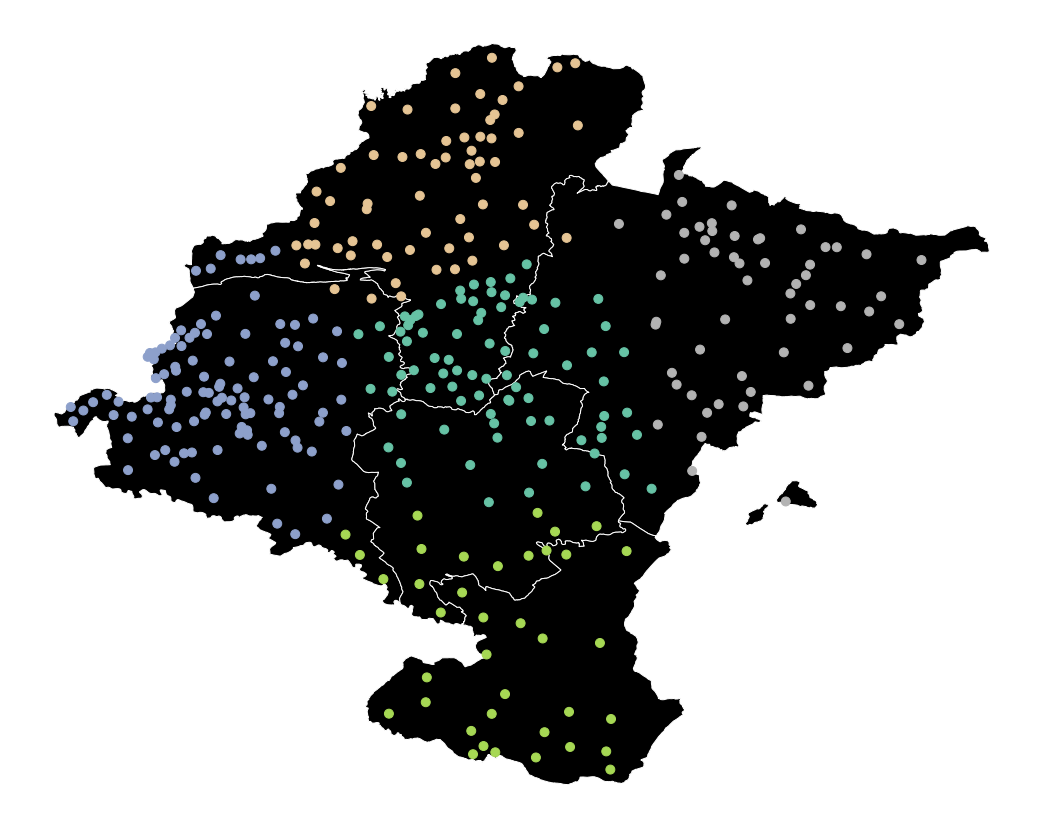

In [9]:
fig, ax = plt.subplots(1, figsize=(20, 15))
merindadesGDF.plot(ax = ax, color = 'black', facecolor='none', edgecolor='white', linewidth=1)
municipiosGDF.plot(column='cluster',cmap='Set2', ax=ax, markersize=80)
ax.set_axis_off()
plt.show()

In [10]:
municipiosGDF = municipiosGDF.drop(['cluster'], axis=1)

In [11]:
municipiosGDF.head()

,geometry,FEATURE,CMUNICIPIO,MUNICIPIO,MUNINOAC,GEOM_AREA,GEOM_PERI,BEGINLIFE
0,POINT (-1.01521 42.92839),200020,509,Facería 9,Faceria 9,14317614.26,25936.88,08/09/2022
1,POINT (-1.21023 42.90954),200020,4,Abaurrepea / Abaurrea Baja,Abaurrepea/Abaurrea Baja,11107631.13,32356.55,08/09/2022
2,POINT (-0.99509 42.73723),200020,59,Burgui / Burgi,Burgui / Burgi,64579311.66,34330.61,08/09/2022
3,POINT (-1.16047 42.94549),200020,510,Facería 10,Faceria 10,607801.55,3690.44,08/09/2022
4,POINT (-1.23914 42.63084),200020,511,Facería 11,Faceria 11,538218.22,3110.25,08/09/2022
